# Data Exploration of COVID-19
14 March 2020

Cecilia García López de Munain

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pickle

## Parameters

In [2]:
sys.path.append('./')

In [3]:
PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME = 'covid_19_data_cum'

## Import Data

In [4]:
covid19_data = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME), "rb" ))

In [5]:
covid19_data.head()

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,
2019-12-31,Vietnam,0,0,VN,NaN,Non-EU/EEA,0,0
2019-12-31,Sri Lanka,0,0,LK,NaN,Non-EU/EEA,0,0
2019-12-31,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0,0,0
2019-12-31,Kuwait,0,0,KW,NaN,Non-EU/EEA,0,0
2019-12-31,Armenia,0,0,AM,NaN,Non-EU/EEA,0,0


In [6]:
# Not studying conveyance Japan so dropping it 
covid19_data = covid19_data[covid19_data['CountryExp'] != 'Cases on an international conveyance Japan']

## Explore possible features

Understand China's contagion behaviour

In [7]:
covid19_data_china = covid19_data[covid19_data['CountryExp'] == 'China']

c:\users\c.lopez.de.munain\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


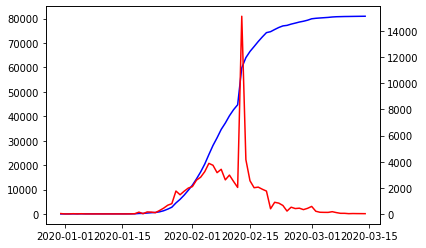

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(covid19_data_china['NewConfCases_cum'], color='blue')
ax2 = ax1.twinx()
ax2.plot(covid19_data_china['NewConfCases'], color='red')
plt.show()

c:\users\c.lopez.de.munain\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


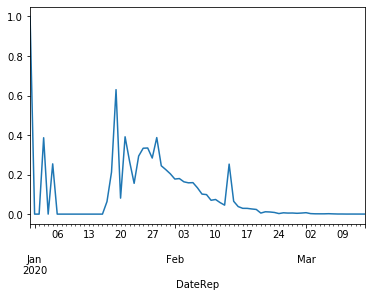

In [9]:
covid19_data_china['prop_increment'] = covid19_data_china['NewConfCases']/covid19_data_china['NewConfCases_cum']
covid19_data_china['prop_increment'].plot()